In [60]:
!pip install plotly

You should consider upgrading via the '/home/chriferob/desarrollo/dev_iaml/ml_env/bin/python -m pip install --upgrade pip' command.


In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px


### First look

In [62]:
data=pd.read_csv('input/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
nr, nc = data.shape
print (f"There are {nr} rows and {nc} columns")

There are 768 rows and 9 columns


In [64]:
data.size
print (f"There are {data.size} atributes in data")

There are 6912 atributes in data


In [65]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [93]:
data["Outcome"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [66]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [68]:
data.describe().round(2).style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.850000,120.890000,69.110000,20.540000,79.800000,31.990000,0.470000,33.240000,0.350000
std,3.370000,31.970000,19.360000,15.950000,115.240000,7.880000,0.330000,11.760000,0.480000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.630000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [69]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [87]:
data.duplicated().sum()

0

### EDA

/tmp/ipykernel_31971/3819124131.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

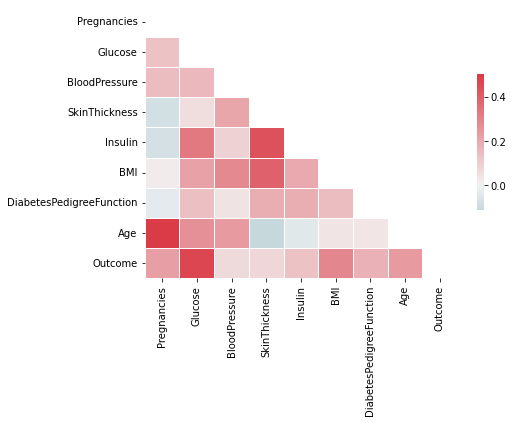

In [88]:
corr=data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, linewidths=.5, cbar_kws={"shrink": .5})

In [89]:
lis=["don't have diabetes","have diabetes"]
have_or_not = data["Outcome"].value_counts().tolist()
values = [have_or_not[0], have_or_not[1]]
fig = px.pie(values=data['Outcome'].value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="percentage between have diabetes or not")
fig.show()

In [91]:
data["Outcome"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [94]:
plt.figure(figsize=(4,4))

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

In [95]:
fig = px.bar(data['Age'].value_counts(), height=400, width = 700) 
fig.show()

In [75]:
#data.plot(subplots =True, kind = 'box', layout = (4,5), figsize = (20,17), color = 'DarkRed')
#plt.subplots_adjust(wspace = 0.3, hspace= 0.3)

/home/chriferob/desarrollo/dev_iaml/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Glucose', ylabel='Density'>

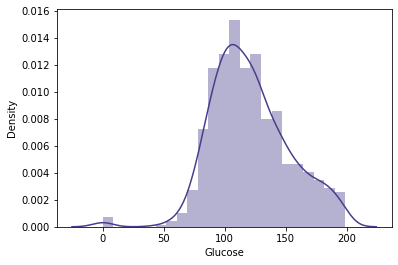

In [96]:
sns.distplot(data['Glucose'],color ="DarkSlateBlue" )

/home/chriferob/desarrollo/dev_iaml/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

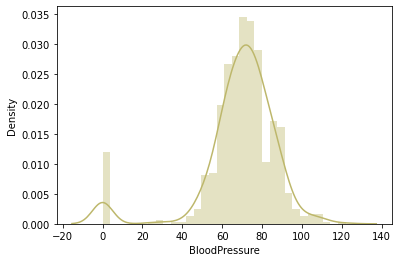

In [77]:
sns.distplot(data['BloodPressure'], color = 'DarkKhaki')

/home/chriferob/desarrollo/dev_iaml/ml_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Insulin', ylabel='Density'>

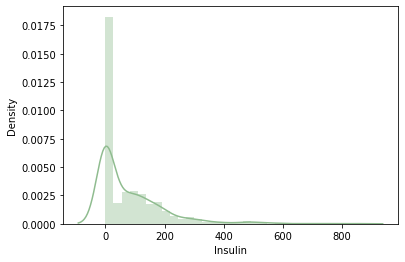

In [97]:
sns.distplot(data['Insulin'],color ="DarkSeaGreen" )

### Split Data

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x = data.drop(['Outcome'] , axis = 1).values
y = data['Outcome' ].values
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)

### Scale data

In [108]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
scaler = MinMaxScaler()

In [110]:
scaler.fit(x_train)

MinMaxScaler()

In [111]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [112]:
r, c = x_train.shape
r2 ,c2 = x_test.shape
print (f"x_train = {r} and y_train = {y_train.shape} ")
print (f"x_test = {r2} and y_test = {y_test.shape} ")

x_train = 614 and y_train = (614,) 
x_test = 154 and y_test = (154,) 


### Create Model

In [115]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

2022-10-29 11:38:41.128347: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-29 11:38:41.266693: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-29 11:38:41.270135: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-29 11:38:41.270145: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [116]:
model = Sequential()

2022-10-29 11:38:42.479609: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-29 11:38:42.479642: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-29 11:38:42.479662: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (chriferob-ThinkPad-E15-Gen-2): /proc/driver/nvidia/version does not exist
2022-10-29 11:38:42.480007: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [117]:

model.add(Dense(20,activation='relu'))

model.add(Dense(20,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [118]:
model.fit(x_train, y_train,batch_size=10,epochs=200)

Epoch 1/200
62/62 [==============================] - 0s 925us/step - loss: 0.6739 - accuracy: 0.6531
Epoch 2/200
62/62 [==============================] - 0s 1ms/step - loss: 0.6566 - accuracy: 0.6531
Epoch 3/200
62/62 [==============================] - 0s 1ms/step - loss: 0.6473 - accuracy: 0.6531
Epoch 4/200
62/62 [==============================] - 0s 979us/step - loss: 0.6334 - accuracy: 0.6531
Epoch 5/200
62/62 [==============================] - 0s 844us/step - loss: 0.6198 - accuracy: 0.6547
Epoch 6/200
62/62 [==============================] - 0s 1ms/step - loss: 0.6026 - accuracy: 0.6629
Epoch 7/200
62/62 [==============================] - 0s 865us/step - loss: 0.5857 - accuracy: 0.6938
Epoch 8/200
62/62 [==============================] - 0s 873us/step - loss: 0.5664 - accuracy: 0.7117
Epoch 9/200
62/62 [==============================] - 0s 921us/step - loss: 0.5561 - accuracy: 0.7068
Epoch 10/200
62/62 [==============================] - 0s 906us/step - loss: 0.5409 - accuracy: 0.

62/62 [==============================] - 0s 837us/step - loss: 0.4199 - accuracy: 0.7964
Epoch 82/200
62/62 [==============================] - 0s 891us/step - loss: 0.4199 - accuracy: 0.7915
Epoch 83/200
62/62 [==============================] - 0s 820us/step - loss: 0.4195 - accuracy: 0.7915
Epoch 84/200
62/62 [==============================] - 0s 842us/step - loss: 0.4196 - accuracy: 0.7883
Epoch 85/200
62/62 [==============================] - 0s 799us/step - loss: 0.4181 - accuracy: 0.7866
Epoch 86/200
62/62 [==============================] - 0s 783us/step - loss: 0.4194 - accuracy: 0.7883
Epoch 87/200
62/62 [==============================] - 0s 764us/step - loss: 0.4246 - accuracy: 0.7980
Epoch 88/200
62/62 [==============================] - 0s 820us/step - loss: 0.4180 - accuracy: 0.7964
Epoch 89/200
62/62 [==============================] - 0s 921us/step - loss: 0.4175 - accuracy: 0.7932
Epoch 90/200
62/62 [==============================] - 0s 883us/step - loss: 0.4199 - accuracy: 

62/62 [==============================] - 0s 954us/step - loss: 0.4037 - accuracy: 0.8078
Epoch 162/200
62/62 [==============================] - 0s 988us/step - loss: 0.4000 - accuracy: 0.8160
Epoch 163/200
62/62 [==============================] - 0s 1ms/step - loss: 0.4011 - accuracy: 0.7980
Epoch 164/200
62/62 [==============================] - 0s 1ms/step - loss: 0.4050 - accuracy: 0.8062
Epoch 165/200
62/62 [==============================] - 0s 966us/step - loss: 0.3982 - accuracy: 0.8094
Epoch 166/200
62/62 [==============================] - 0s 801us/step - loss: 0.4008 - accuracy: 0.8143
Epoch 167/200
62/62 [==============================] - 0s 861us/step - loss: 0.3997 - accuracy: 0.8176
Epoch 168/200
62/62 [==============================] - 0s 897us/step - loss: 0.3999 - accuracy: 0.8094
Epoch 169/200
62/62 [==============================] - 0s 835us/step - loss: 0.3977 - accuracy: 0.8111
Epoch 170/200
62/62 [==============================] - 0s 890us/step - loss: 0.3964 - accur

<AxesSubplot:>

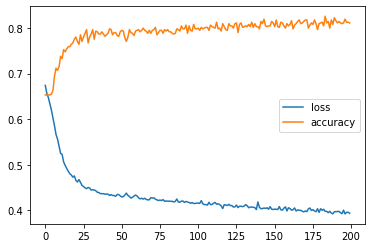

In [120]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [124]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [125]:
prediction = model.predict(x_test)
prediction  = [1 if y>=0.5 else 0 for y in prediction] 


5/5 [==============================] - 0s 1ms/step


In [126]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [127]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [128]:
mean_abs_error=mean_absolute_error(prediction,y_test)
mean_abs_error

0.22077922077922077

In [129]:
np.sqrt(mean_squared_error(y_test,prediction))

0.4698714938993648

In [130]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.5311 - accuracy: 0.7792


[0.531121551990509, 0.7792207598686218]